In [1]:
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import datetime

conn=sqlite3.connect("events/database/events.db")



In [2]:
events = pd.read_sql_query("SELECT * FROM events_table", conn)

events["date"]=events["date"].str.replace("-","").str.strip()
events["date"]=pd.to_datetime(events["date"], format='%Y.%m.%d. %H:%M')

In [5]:
events.head()

,title,date,category,url
0,Autók kereke tört ki a Kerepesi úton,2017-10-31 21:08:00,"Közlekedési baleset, közúti baleset",https://www.katasztrofavedelem.hu/modules/vesz...
1,Raktár gyulladt ki Gárdonyban,2017-10-31 19:45:00,"Tűzeset, melléképület-tűz",https://www.katasztrofavedelem.hu/modules/vesz...
2,Halálos baleset történt Miskolc határában,2017-10-31 17:26:00,"Közlekedési baleset, közúti baleset",https://www.katasztrofavedelem.hu/modules/vesz...
3,Két gépkocsi karambolozott a XIV. kerületben,2017-10-31 17:20:00,"Közlekedési baleset, közúti baleset",https://www.katasztrofavedelem.hu/modules/vesz...
4,Összeütközött két autó Debrecenben,2017-10-31 17:04:00,"Közlekedési baleset, közúti baleset",https://www.katasztrofavedelem.hu/modules/vesz...


<AxesSubplot: xlabel='date'>

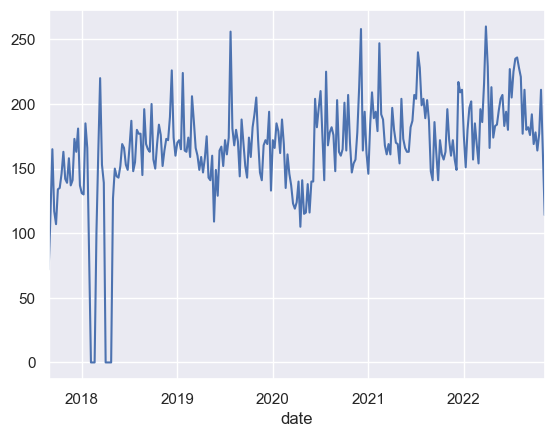

In [4]:
events.resample("W", on="date").title.count().plot()

In [16]:
split_categories=events["category"].str.lower().str.replace(", ", ",").str.get_dummies(sep=',')
split_categories["date"]=events["date"]
split_categories.head()

,avartűz,belvíz,biztonságban külföldön,egyéb esemény,egyéb műszaki mentés,erdőtűz,földalatti),földcsuszamlás,földrengés,garázstűz,...,tűzeset,tűzeset szabad területen,vasúti baleset,vegetációs tűz,viharkárok felszámolása,villamos,vízi közlekedési baleset,árvíz,útinform,date
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017-10-31 21:08:00
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2017-10-31 19:45:00
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017-10-31 17:26:00
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017-10-31 17:20:00
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017-10-31 17:04:00


<AxesSubplot: xlabel='date'>

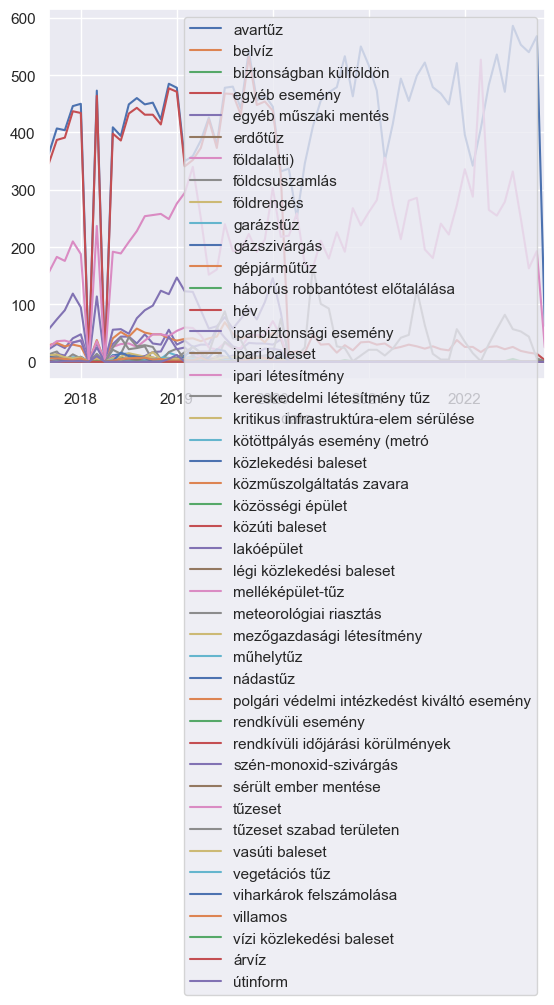

In [21]:
split_categories.resample("M", on="date").sum().plot()
